<a href="https://colab.research.google.com/github/pooja251096/Netflix-Movies-and-Tv-shows-clustering/blob/main/Pooja_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## **1. Importing Libraries**

In [ ]:
import numpy as np
import scipy
import pandas as pd
import math
import random
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler

from time import time

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

## **2.Import Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

## **3. Basic Data Exploration**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# Summary Statistics of the data
# It returned descriptive statistics of all Numerical type attribute release_year
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
#include object gives the summary statistics of the character attributes
df.describe(include=['object'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


## **4. Data Cleaning and data Visualization**

In [ ]:
#Attributes director, cast, and country has missing 2634, 825 and 831 respectively, 
#we can not directly drop it because it will loss of data so we can fill this value with 'some string' Entry
df['director'].fillna('No Director', inplace=True)
df['cast'].fillna('No Cast', inplace=True)
df['country'].fillna('Country Unavailable', inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.nunique()


show_id         7770
type               2
title           7770
director        4048
cast            6818
country          682
date_added      1563
release_year      73
rating            14
duration         216
listed_in        491
description     7752
dtype: int64

**Netflix Content By Type**

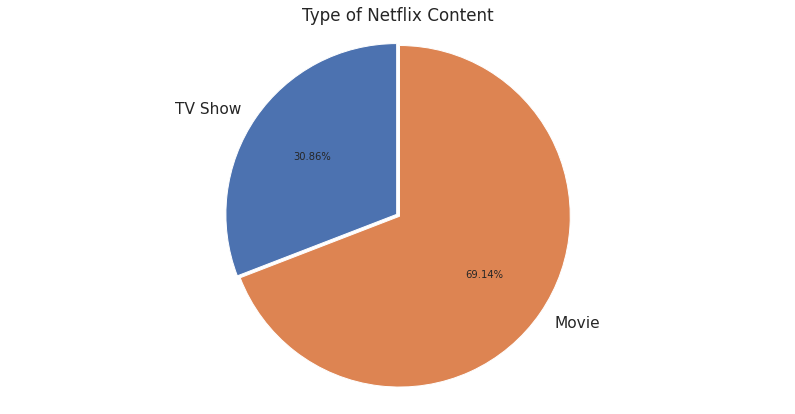

In [ ]:
#Plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.01,0.01],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

Type of Content on Netflix

30.4 % TV Show and 69.6% Movie Content.
The most content type on Netflix is movies.

# **Production Growth based on type of the content & release_year**

In [ ]:
yearly_movies=df[df.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=df[df.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=df['release_year'].value_counts().sort_index(ascending=False).head(15)

In [ ]:
yearly_movies.head()

2021     19
2020    457
2019    414
2018    386
2017    268
Name: release_year, dtype: int64

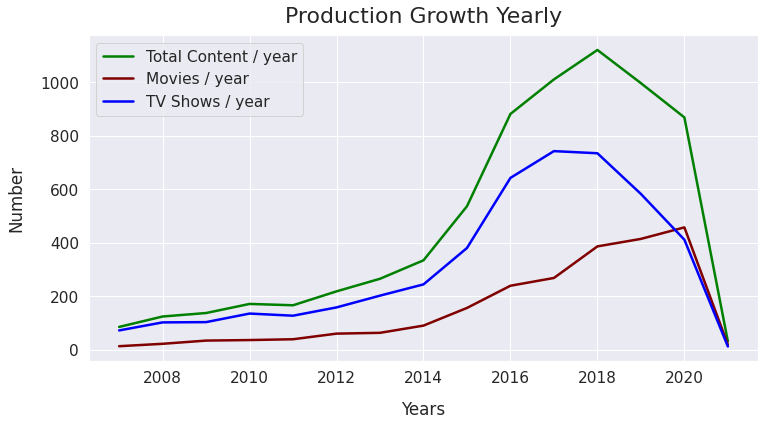

In [ ]:
sns.set(font_scale=1.4)
total_content.plot(figsize=(12, 6), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(12, 6), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(12, 6), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);

The popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been increasing significantly,

# **Release_year**


Let's see all unique values present in release_year

In [ ]:
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [ ]:
type(df['release_year'][0])

numpy.int64

In [ ]:
df['release_year'].value_counts().to_frame().T


,2018,2017,2019,2016,2020,2015,2014,2013,2012,2010,...,1969,1963,1954,1970,1956,1925,1964,1966,1947,1959
release_year,1120,1010,996,881,868,536,334,265,218,171,...,2,2,2,2,2,1,1,1,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


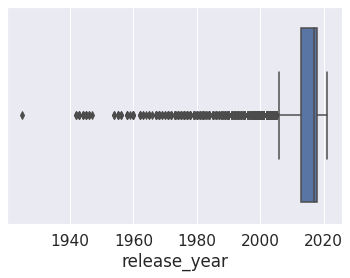

In [ ]:
sns.boxplot(df.release_year)


As we have seen earlier before 2014 the production growth for Movies & Tv Shows were very less ,that's why it's showing those values as outliers

In [ ]:
release_year_Q1 = df.release_year.quantile(0.25)
release_year_Q3 = df.release_year.quantile(0.75)
release_year_IQR = release_year_Q3 - release_year_Q1
print(f'release_year_Q1 = {release_year_Q1}\nrelease_year_Q3 = {release_year_Q3}\nrelease_year_IQR = {release_year_IQR}')

release_year_Q1 = 2013.0
release_year_Q3 = 2018.0
release_year_IQR = 5.0


In [ ]:
release_year_outliers = df[(df.release_year < (release_year_Q1 - 1.5 * release_year_IQR)) |
                           ( df.release_year > (release_year_Q3 + 1.5 * release_year_IQR)) ]

In [ ]:
release_year_outliers


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
44,s45,Movie,Æon Flux,Karyn Kusama,"Charlize Theron, Marton Csokas, Jonny Lee Mill...",United States,"February 1, 2018",2005,PG-13,93 min,"Action & Adventure, Sci-Fi & Fantasy","Aiming to hasten an uprising, the leader of an..."
94,s95,Movie,28 Days,Betty Thomas,"Sandra Bullock, Viggo Mortensen, Dominic West,...",United States,"September 30, 2020",2000,PG-13,104 min,"Comedies, Dramas",After her drunken antics result in property da...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",Country Unavailable,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...
105,s106,Movie,300 Miles to Heaven,Maciej Dejczer,"Krzysztof Stroiński, Andrzej Mellin, Adrianna ...","Denmark, France, Poland","October 1, 2019",1989,TV-14,93 min,"Dramas, International Movies","Hoping to help their dissident parents, two br..."
...,...,...,...,...,...,...,...,...,...,...,...,...
7745,s7746,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
7749,s7750,TV Show,Yu-Gi-Oh!,No Director,"Dan Green, Eric Stuart, Amy Birnbaum, Darren D...",Japan,"July 8, 2020",2005,TV-Y7,2 Seasons,"Anime Series, Kids' TV",The lives of young Yugi Moto and his friends J...
7754,s7755,Movie,Yuva,Mani Ratnam,"Ajay Devgn, Abhishek Bachchan, Vivek Oberoi, E...",India,"March 1, 2018",2004,TV-14,160 min,"Dramas, International Movies",An accident on a bridge ties together three yo...
7760,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,"May 19, 2020",2005,TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...


In [ ]:
np.percentile(df["release_year"],1)

2010.0

In [ ]:
#replacing outliers with means
df["release_year"] = np.where(df["release_year"] <2010, df.release_year.mean(),df['release_year'])

In [ ]:
df.release_year.describe()


count    7770.000000
mean     2016.390339
std         2.547373
min      2010.000000
25%      2014.000000
50%      2017.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


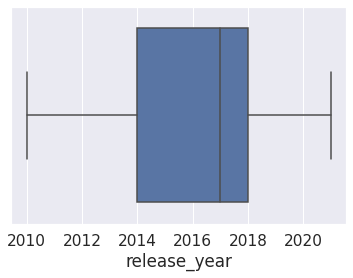

In [ ]:
sns.boxplot(df.release_year)


# **Title**

No of unique title present in title column

In [ ]:
df.title.nunique()

7770

In [ ]:
df.shape

(7770, 12)

All the values present in Title are unique

Most occured word in Title ??

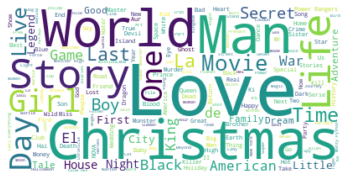

In [ ]:
#subsetting df
df_wordcloud = df['title']
text = " ".join(word for word in df_wordcloud)
# Create stopword list:
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It seems like words like "Love", "Man", "World", "Story" , "Christmas" are very common in titles.

# **Countries producing most number of contents**

In [ ]:
df.country.nunique()

682

In [ ]:
df.country.value_counts().rename_axis('Country').reset_index(name='counts').T


,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681
Country,United States,India,Country Unavailable,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,2546,923,505,396,224,183,177,134,115,101,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
country_list=[]
tv_show=[]
movies=[]
for i in range(0,len(df)):
  if isinstance(df['country'].iloc[i] , str):
    split=df['country'].iloc[i].split(',')
    for k in split:
      country_list.append(k.strip())
      if df['type'].iloc[i]=='TV Show':
        tv_show.append(k.strip())
      if df['type'].iloc[i]== 'Movie':
        movies.append(k.strip())
production_country=list(set([(i,country_list.count(i),tv_show.count(i),movies.count(i)) for i in country_list]))

In [ ]:
production_country[:5]

[('South Africa', 54, 10, 44),
 ('Bulgaria', 9, 0, 9),
 ('Serbia', 7, 0, 7),
 ('Guatemala', 2, 0, 2),
 ('United Kingdom', 722, 255, 467)]

In [ ]:
country_df= pd.DataFrame(production_country,columns=['country','Productions','TV-Shows','Movies']) 
country_df=country_df.sort_values('Productions',ascending=False)
country_df=country_df.reset_index()
country_df=country_df.drop('index',axis=1)


In [ ]:
#Top 5 countries
top_countries=country_df.head()
top_countries

,country,Productions,TV-Shows,Movies
0,United States,3288,860,2428
1,India,990,75,915
2,United Kingdom,722,255,467
3,Country Unavailable,505,276,229
4,Canada,412,126,286


In [ ]:
top_countries.T

,0,1,2,3,4
country,United States,India,United Kingdom,Country Unavailable,Canada
Productions,3288,990,722,505,412
TV-Shows,860,75,255,276,126
Movies,2428,915,467,229,286


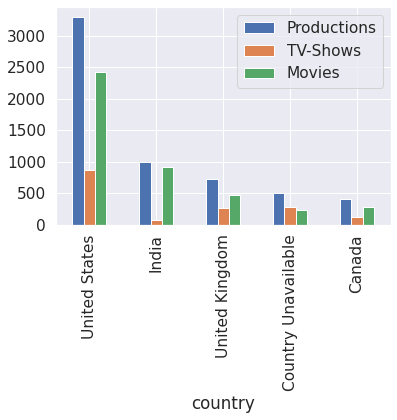

In [ ]:
top_countries.head(9).plot(x="country", y=['Productions','TV-Shows','Movies'], kind="bar")


United States is the leader in producing content on Netflix and India is on second position

## Ratings

In [ ]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
df['rating'].value_counts().reset_index().rename(columns={'index': 'rating','rating':'counts'})

,rating,counts
0,TV-MA,2861
1,TV-14,1928
2,TV-PG,804
3,R,665
4,PG-13,386
5,TV-Y,279
6,TV-Y7,270
7,PG,247
8,TV-G,194
9,NR,83


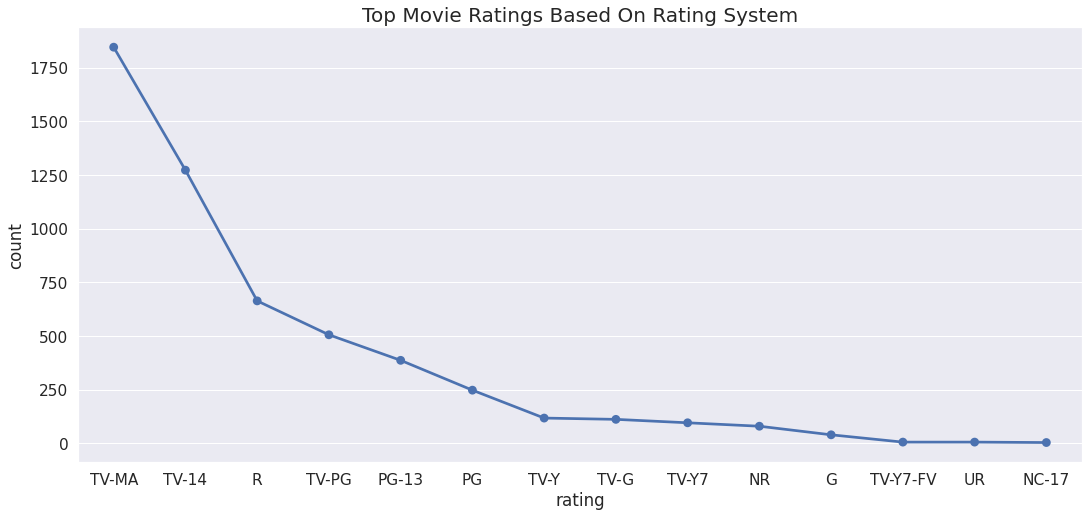

In [ ]:
df_tv = df[df["type"] == "TV Show"]
df_movie = df[df["type"] == "Movie"]

movie_ratings = df_movie.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

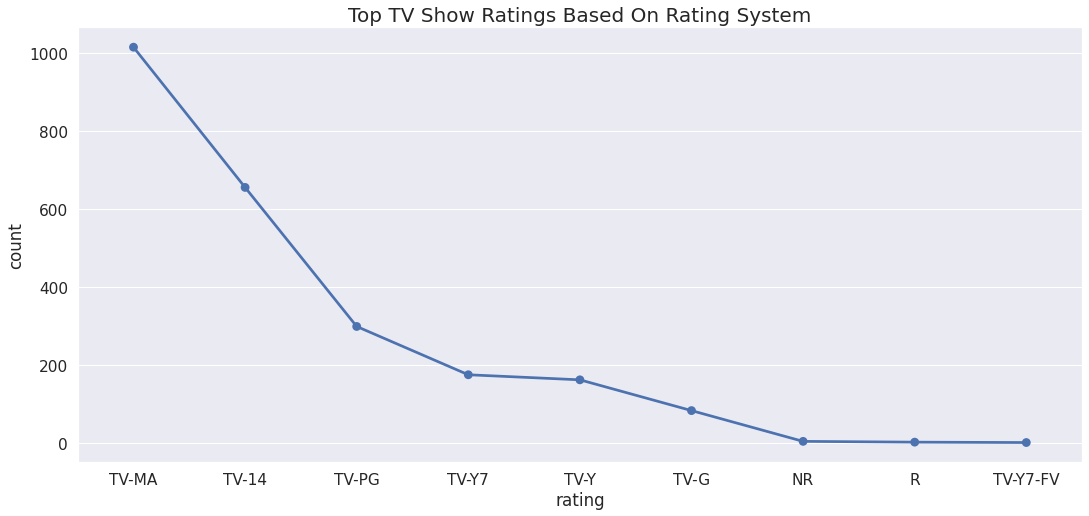

In [ ]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,8)
fig, ax = plt.subplots(figsize=fig_dims)  
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

#Genres

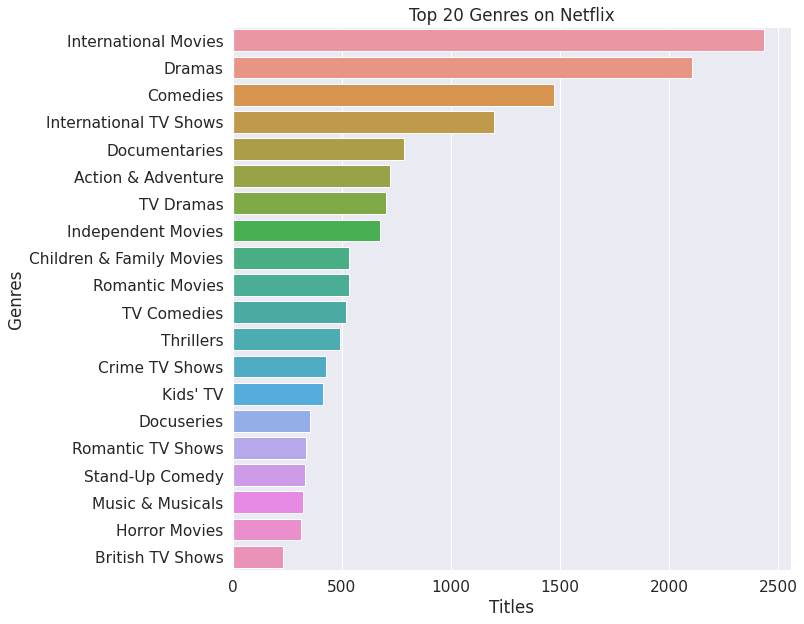

In [ ]:
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

# Top 10 Actors

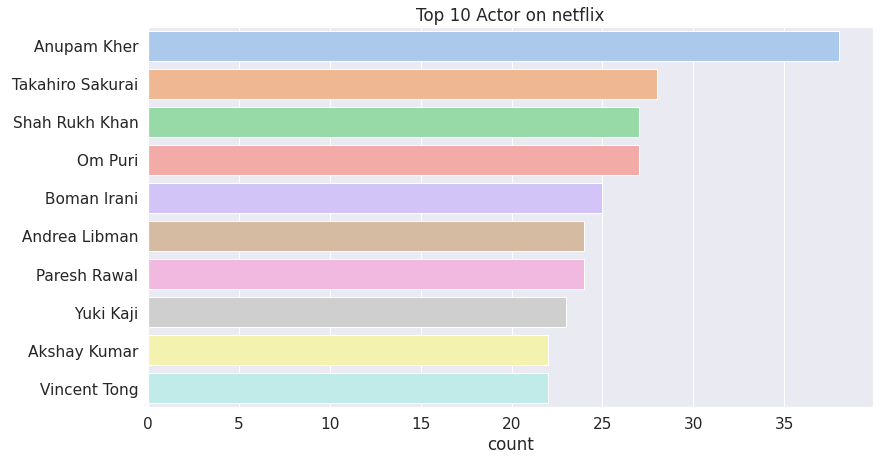

In [ ]:
filtered_cast_shows = df[df.cast != 'No Cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor on netflix')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

## <font size="+2" color='#154085'><b>5. Data Prepreation *(nlp data)*

### 5.1 **description**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month'],
      dtype='object')

In [ ]:
df.description.iloc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [ ]:
First_des = df.description.iloc[0]
First_des

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

* #### 5.1.1 Importing necessary libraries

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

* **Download nltk**

In [ ]:
import nltk 
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

* #### <b>5.1.2 Removing punctuations

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
df['description'] = df['description'].apply(remove_punctuation)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,A brilliant group of students become cardcount...,1,January


* #### <b> 5.1.3 Removing stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [ ]:
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


In [ ]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [ ]:
df['description'] = df['description'].apply( remove_stopwords )
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,brilliant group students become cardcounting e...,1,January


Now all the values of description are punctutation free ans stopword free

* #### 5.1.4 Using **CountVectorizer()** to count vocabulary items

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

dict_items([('future', 7153), ('elite', 5642), ('inhabit', 8945), ('island', 9221), ('paradise', 12668), ('far', 6398), ('crowded', 4230), ('slums', 16086), ('get', 7349), ('one', 12297), ('chance', 3060), ('join', 9439), ('saved', 15190), ('squalor', 16502), ('devastating', 4825), ('earthquake', 5491), ('hits', 8306), ('mexico', 11098), ('city', 3326), ('trapped', 17904), ('survivors', 17050), ('walks', 18862), ('life', 10168), ('wait', 18839), ('rescued', 14507), ('trying', 18046), ('desperately', 4778), ('stay', 16611), ('alive', 781), ('army', 1222), ('recruit', 14227), ('found', 6937), ('dead', 4492), ('fellow', 6524), ('soldiers', 16211), ('forced', 6873), ('confront', 3780), ('terrifying', 17426), ('secret', 15378), ('thats', 17480), ('haunting', 8010), ('jungle', 9534), ('training', 17861), ('camp', 2751), ('postapocalyptic', 13347), ('world', 19299), ('ragdoll', 13946), ('robots', 14833), ('hide', 8185), ('fear', 6477), ('dangerous', 4419), ('machines', 10525), ('exterminate',

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

* Creating a new *DataFrame* **vocab_before_stemming**

In [ ]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [ ]:
vocab_before_stemming.head(4)

,Word,count
18855,şeref,19593
10390,ōarai,19592
12377,łukasz,19591
11101,überelite,19590


In [ ]:
vocab_before_stemming.head(20).T

,18855,10390,12377,11101,11673,13288,6584,18193,10428,9867,19555,6536,19590,16413,7192,18395,19580,19587,10293,18069
Word,şeref,ōarai,łukasz,überelite,über,ömer,émile,ángel,álvaro,álex,zé,zurich,zumbo,zulu,zuhu,zuckerberg,zoé,zozo,zoya,zorro
count,19593,19592,19591,19590,19589,19588,19587,19586,19585,19584,19583,19582,19581,19580,19579,19578,19577,19576,19575,19574


In [ ]:
vocab_before_stemming.tail(4)

,Word,count
639,100,3
7616,10,2
7962,009,1
6867,007,0


* TOP 10 most occurred words

In [ ]:
top15_most_ocurred_vacab = vocab_before_stemming.head(15)

In [ ]:
top15_most_occurred_words = top15_most_ocurred_vacab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [ ]:
top15_most_occurred_words_count = top15_most_ocurred_vacab['count'].values 
top15_most_occurred_words_count

array([19593, 19592, 19591, 19590, 19589, 19588, 19587, 19586, 19585,
       19584, 19583, 19582, 19581, 19580, 19579])

<BarContainer object of 15 artists>

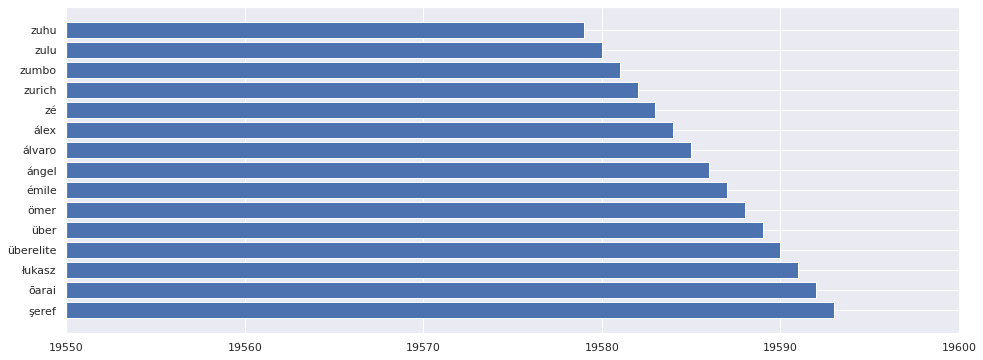

In [ ]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(19550, 19600)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

* #### 5.1.5 Now will use **SnowballStemmer( 'english' )**

In [ ]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [ ]:
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
#Stemming for description
df['description'] = df['description'].apply( Apply_stemming )
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalypt world ragdol robot hide fear dan...,3,November
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January


* #### 5.1.6 Now again will use **TfidfVectorizer** *(after stemming)*

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

* Creating a new *DataFrame* **vocab_after_stemming**

In [ ]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [ ]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)

In [ ]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [ ]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values 
top15_most_occurred_words_count

array([14240, 14239, 14238, 14237, 14236, 14235, 14234, 14233, 14232,
       14231, 14230, 14229, 14228, 14227, 14226])

<BarContainer object of 15 artists>

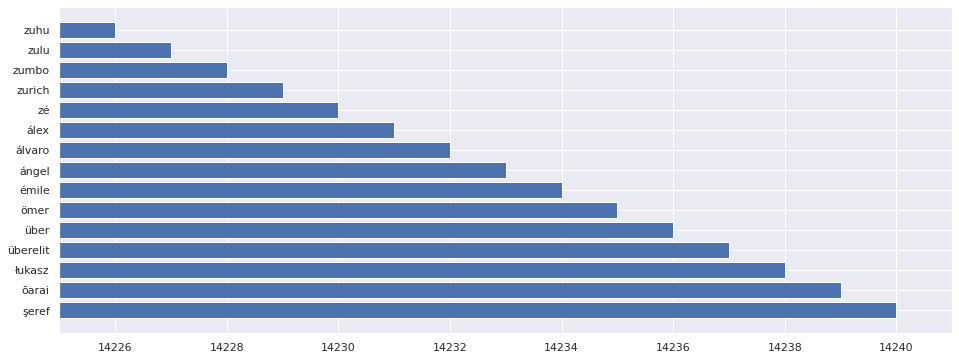

In [ ]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(14225, 14241)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

* #### 5.1.7 Adding a new column **length** which will contain length of description

In [ ]:
df['Length(description)'] = df['description'].apply(lambda x: len(x))

In [ ]:
df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,"International TV Shows, TV Dramas, TV Sci-Fi &...",futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies",armi recruit found dead fellow soldier forc co...,2,December,102


In [ ]:
df.description.iloc[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

In [ ]:
len(df.description.iloc[0])

82

* ### 5.2 **listed_in**

* #### 5.2.1 Removing punctutations

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month', 'Length(description)'],
      dtype='object')

In [ ]:
df['listed_in'] = df['listed_in'].apply(remove_punctuation)
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,International TV Shows TV Dramas TV SciFi Fan...,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,Dramas International Movies,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,Horror Movies International Movies,armi recruit found dead fellow soldier forc co...,2,December,102
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80,Action Adventure Independent Movies SciFi Fa...,postapocalypt world ragdol robot hide fear dan...,3,November,89
4,s5,Movie,21,United States,"January 1, 2020",2013,PG-13,123,Dramas,brilliant group student becom cardcount expert...,1,January,99


* #### 5.2.2 Removing stopwords

In [ ]:
#Remove stopwords for listed_in
df['listed_in'] = df['listed_in'].apply( remove_stopwords )
df.head( 2 )

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,international tv shows tv dramas tv scifi fantasy,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,dramas international movies,devast earthquak hit mexico citi trap survivor...,2,December,88


* #### 5.2.3 Using **CountVectorizer()** to count vocabulary items

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

dict_items([('international', 19), ('tv', 41), ('shows', 33), ('dramas', 12), ('scifi', 31), ('fantasy', 15), ('movies', 23), ('horror', 17), ('action', 0), ('adventure', 1), ('independent', 18), ('mysteries', 26), ('thrillers', 40), ('crime', 8), ('docuseries', 11), ('documentaries', 10), ('sports', 36), ('comedies', 6), ('anime', 2), ('series', 32), ('reality', 28), ('romantic', 29), ('science', 30), ('nature', 27), ('british', 3), ('korean', 21), ('music', 24), ('musicals', 25), ('lgbtq', 22), ('faith', 13), ('spirituality', 35), ('kids', 20), ('spanishlanguage', 34), ('children', 4), ('family', 14), ('classic', 5), ('cult', 9), ('standup', 37), ('comedy', 7), ('talk', 38), ('teen', 39), ('features', 16)])

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [ ]:
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})

listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)

In [ ]:
listed_in_vocab_before_stem.head()

,Word,count
1,tv,41
12,thrillers,40
40,teen,39
39,talk,38
37,standup,37


In [ ]:
listed_in_vocab_before_stem.tail()

,Word,count
33,children,4
24,british,3
18,anime,2
9,adventure,1
8,action,0


* TOP 10 most occurred words in listed in

In [ ]:
top15_most_ocurred_vocab_listed_in = listed_in_vocab_before_stem.head(15)

In [ ]:
top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values 
top15_most_ocurred_words_listed_in

array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series', 'scifi',
       'science', 'romantic', 'reality', 'nature'], dtype=object)

In [ ]:
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values 
top15_most_occurred_words_in_listed_in_count

array([41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27])

<BarContainer object of 15 artists>

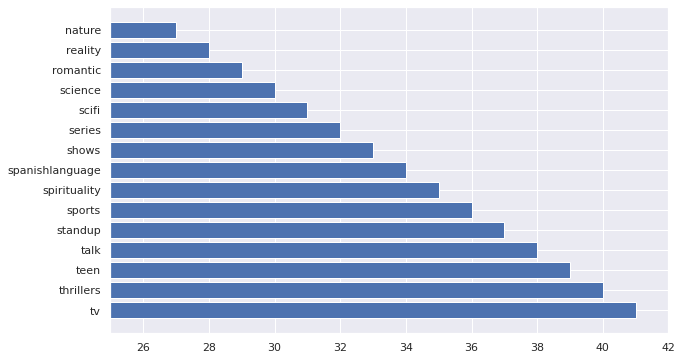

In [ ]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 42 )
plt.barh(top15_most_ocurred_words_listed_in , top15_most_occurred_words_in_listed_in_count )

* #### 5.2.4 Now will use **SnowballStemmer( 'english' )**

In [ ]:
#Stemming for description
df['listed_in'] = df['listed_in'].apply( Apply_stemming )
df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,3,August,82
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2,December,88
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2,December,102


* #### 5.2.5 Now will use **TfidfVectorizer** *(after stemming)*

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
dictionary

dict_items([('intern', 18), ('tv', 39), ('show', 31), ('drama', 11), ('scifi', 29), ('fantasi', 14), ('movi', 22), ('horror', 16), ('action', 0), ('adventur', 1), ('independ', 17), ('mysteri', 24), ('thriller', 38), ('crime', 7), ('docuseri', 10), ('documentari', 9), ('sport', 34), ('comedi', 6), ('anim', 2), ('seri', 30), ('realiti', 26), ('romant', 27), ('scienc', 28), ('natur', 25), ('british', 3), ('korean', 20), ('music', 23), ('lgbtq', 21), ('faith', 12), ('spiritu', 33), ('kid', 19), ('spanishlanguag', 32), ('children', 4), ('famili', 13), ('classic', 5), ('cult', 8), ('standup', 35), ('talk', 36), ('teen', 37), ('featur', 15)])

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

* Creating a new *DataFrame* **vocab_after_stemming_listed_in**

In [ ]:
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

In [ ]:
top15_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(15)

In [ ]:
top15_most_ocurred_vocab_lised_in_after_stem_word = top15_most_ocurred_vocab_lised_in_after_stem.Word.values 
top15_most_ocurred_vocab_lised_in_after_stem_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri', 'scifi', 'scienc', 'romant',
       'realiti', 'natur'], dtype=object)

In [ ]:
top15_most_occurred_words_listed_in_count = top15_most_ocurred_vocab_lised_in_after_stem['count'].values 
top15_most_occurred_words_listed_in_count

array([39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25])

* Plot of the top vocab present in listed_in (after stemming) 

<BarContainer object of 15 artists>

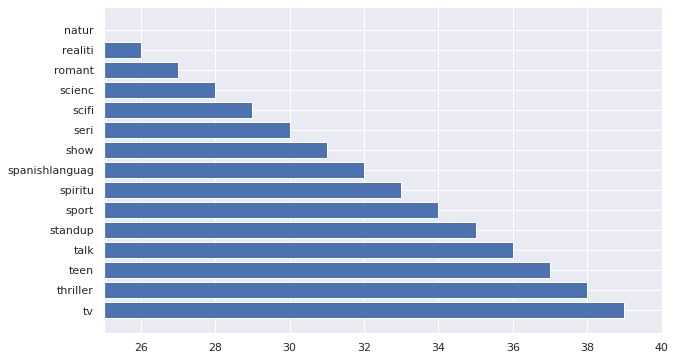

In [ ]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 40 )
plt.barh(top15_most_ocurred_vocab_lised_in_after_stem_word , top15_most_occurred_words_listed_in_count )

* #### 5.2.6 Adding a new column **length( listed-in )** which will contain length of listed_in

In [ ]:
df['Length(listed-in)'] = df['listed_in'].apply(lambda x: len(x))
df.head(3)

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,no_of_category,date_added_month,Length(description),Length(listed-in)
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,1100,intern tv show tv drama tv scifi fantasi,futur elit inhabit island paradis far crowd sl...,3,August,82,40
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93,drama intern movi,devast earthquak hit mexico citi trap survivor...,2,December,88,17
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78,horror movi intern movi,armi recruit found dead fellow soldier forc co...,2,December,102,23


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description', 'no_of_category',
       'date_added_month', 'Length(description)', 'Length(listed-in)'],
      dtype='object')

In [ ]:
df[['description', 'Length(description)', 'listed_in' ,'Length(listed-in)' ]].head(3)

,description,Length(description),listed_in,Length(listed-in)
0,futur elit inhabit island paradis far crowd sl...,82,intern tv show tv drama tv scifi fantasi,40
1,devast earthquak hit mexico citi trap survivor...,88,drama intern movi,17
2,armi recruit found dead fellow soldier forc co...,102,horror movi intern movi,23
